In [8]:
import cv2
from darkflow.net.build import TFNet
from sys import exit
import matplotlib.pyplot as plt

import numpy as np

%config InlineBackend.figure_format = 'svg'

In [9]:
options = {
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolo.weights',
    'threshold' : 0.3,
    'gpu' : 1.0
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.010437965393066406s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep

In [13]:
img = cv2.imread('sample_img/sample_person.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(img)

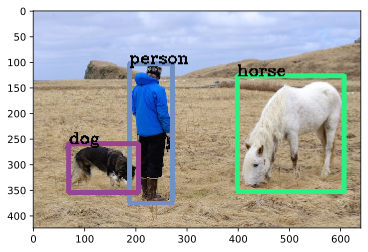

In [14]:
colors = [tuple(255*np.random.rand(3)) for _ in range(10)]

for color, result in zip(colors, results):
    t1 = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']

    img = cv2.rectangle(img, t1, br, color, 7)
    img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0),2)

plt.imshow(img)
plt.show()